In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./palm_ffb.csv")

In [3]:
df.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           130 non-null    object 
 1   SoilMoisture   130 non-null    float64
 2   Average_Temp   130 non-null    float64
 3   Min_Temp       130 non-null    float64
 4   Max_Temp       130 non-null    float64
 5   Precipitation  130 non-null    float64
 6   Working_days   130 non-null    int64  
 7   HA_Harvested   130 non-null    float64
 8   FFB_Yield      130 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.3+ KB


In [5]:
df.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


In [6]:
# Check for null value
df.isnull().sum()

Date             0
SoilMoisture     0
Average_Temp     0
Min_Temp         0
Max_Temp         0
Precipitation    0
Working_days     0
HA_Harvested     0
FFB_Yield        0
dtype: int64

array([[<AxesSubplot:title={'center':'SoilMoisture'}>,
        <AxesSubplot:title={'center':'Average_Temp'}>,
        <AxesSubplot:title={'center':'Min_Temp'}>],
       [<AxesSubplot:title={'center':'Max_Temp'}>,
        <AxesSubplot:title={'center':'Precipitation'}>,
        <AxesSubplot:title={'center':'Working_days'}>],
       [<AxesSubplot:title={'center':'HA_Harvested'}>,
        <AxesSubplot:title={'center':'FFB_Yield'}>, <AxesSubplot:>]],
      dtype=object)

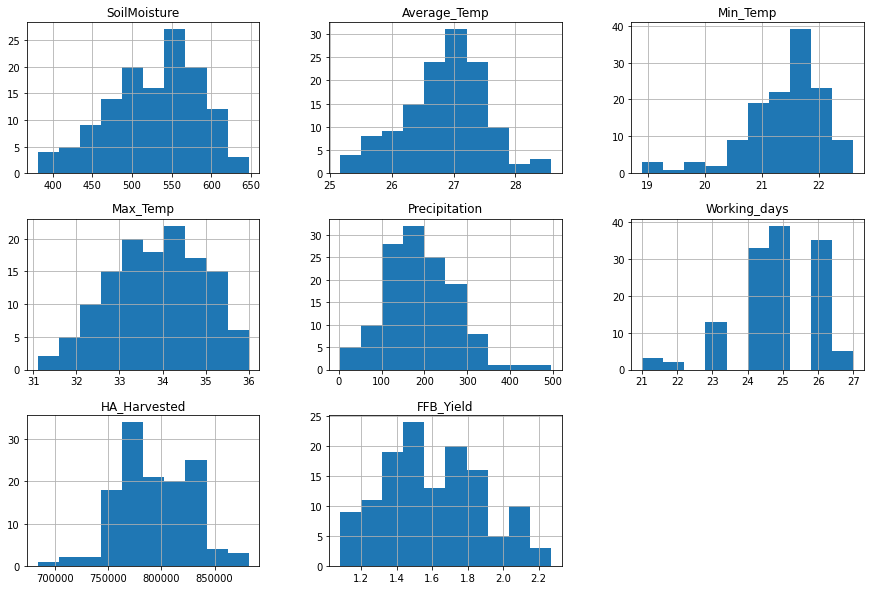

In [7]:
# Data distributions
df.hist(figsize=(15,10))

In [8]:
df_cor = df.corr()

<AxesSubplot:>

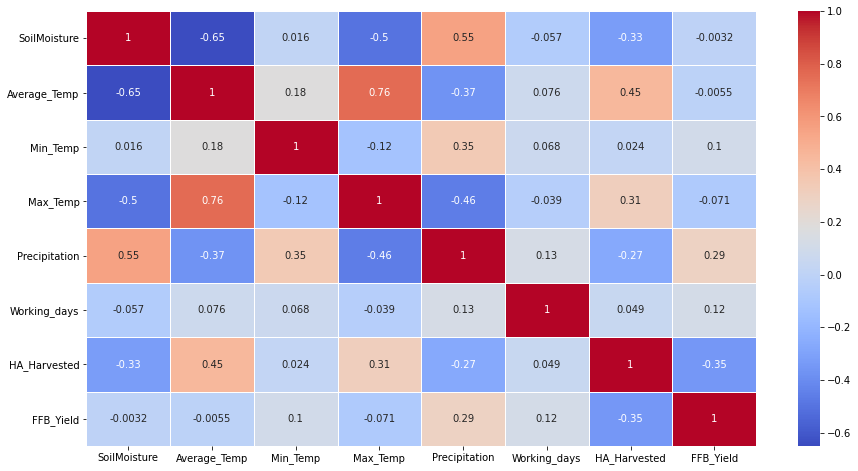

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(df_cor, annot=True, cmap='coolwarm', linewidths='1')

Text(0, 0.5, 'FBB Yield')

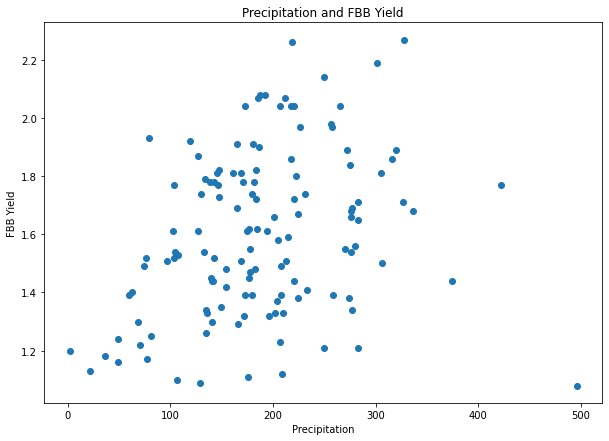

In [10]:
plt.figure(figsize=(10,7))
plt.title("Precipitation and FBB Yield")
plt.scatter(df['Precipitation'], df['FFB_Yield'])
plt.xlabel('Precipitation')
plt.ylabel('FFB Yield')

Text(0, 0.5, 'FBB Yield')

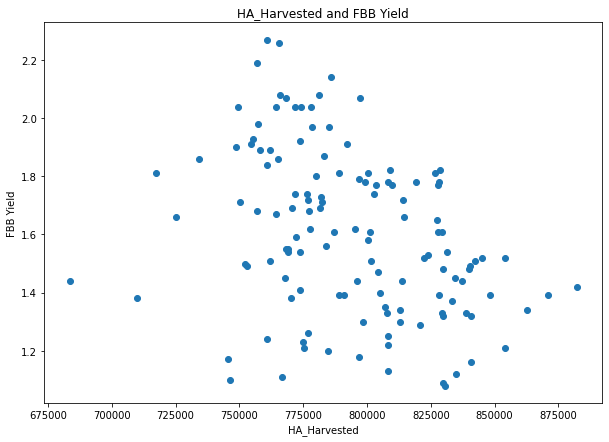

In [17]:
plt.figure(figsize=(10,7))
plt.title("HA_Harvested and FBB Yield")
plt.scatter(df['HA_Harvested'], df['FFB_Yield'])
plt.xlabel('HA_Harvested')
plt.ylabel('FFB Yield')

### Findings:
* Precipitation and HA_Harvested have significant impact on FBB Yield
* Precipitation has a positive correlation while HA_Harvested gas a negative correlation
* Min Temperature and Working days have some impact on FBB Yeild
* Surprisingly the soil moisture has insignificant impact on FBB Yield in this dataset

Feature: SoilMoisture, Score: 0.1150981238350739
Feature: Average_Temp, Score: 0.15198510764291648
Feature: Min_Temp, Score: 0.07077063115217454
Feature: Precipitation, Score: 0.2656657033049737
Feature: Working_days, Score: 0.04001863995701751
Feature: HA_Harvested, Score: 0.3564617941078439


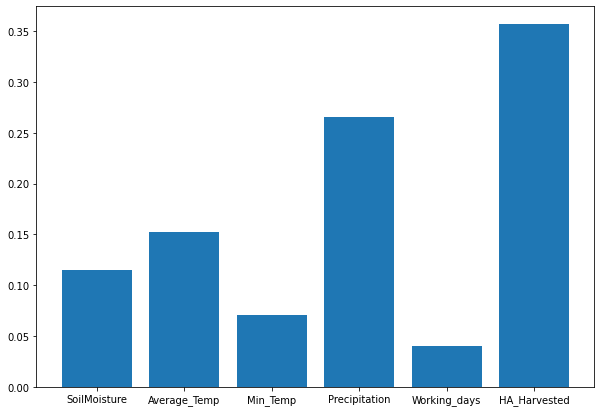

In [36]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

feat_used = ["SoilMoisture", "Average_Temp", "Min_Temp", "Precipitation", "Working_days", "HA_Harvested"]
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
model = RandomForestRegressor()

# The Max_Temp faeture is dropped due to it is highly correlated with Avg_Temp
model.fit(df.drop(['FFB_Yield', 'Max_Temp', 'Date'], axis=1), df['FFB_Yield'])

# get importance of each feature
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {}, Score: {}'.format(feat_used[i],v))
# plot feature importance
plt.figure(figsize=(10, 7))
plt.bar(feat_used, importance)
plt.show()

### Findings:
The feature importance of this trained random forest model is very similary to the correlation analysis performed above, so it is safe to say that the top 3 factors affecting the FFB yield are HA_Harvested, Precipitation, and Average_Temp, listed in order.

# Identify Ideal Environment
Lets find out the Ideal Environment for the top 25% FFB Yields 

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FFB_Yield'>

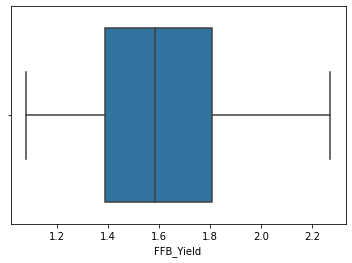

In [37]:
sns.boxplot(df['FFB_Yield'])

In [41]:
df.FFB_Yield.describe()

count    130.000000
mean       1.602231
std        0.281751
min        1.080000
25%        1.390000
50%        1.585000
75%        1.807500
max        2.270000
Name: FFB_Yield, dtype: float64

In [47]:
top25_df = df[df['FFB_Yield'] >= 1.8075]

In [49]:
top25_df.mean()

SoilMoisture        527.978788
Average_Temp         26.829387
Min_Temp             21.466667
Max_Temp             33.733333
Precipitation       214.230303
Working_days         24.727273
HA_Harvested     772679.248773
FFB_Yield             1.967879
dtype: float64

### Summary:
In a nutshell, weather has huge impact on the FFB Yield of oil palm tree.
The Ideal environment for top 25% FFB Yield are:
* Soil Moisture of 528
* Precipitation of 214.23
* HA_Harvested of 772679.25